<div style="display: flex; justify-content: center; align-items: center; height: 100px; background-color: #245dd8; color: #FFFFFF;">
    <h1>Statistics II Activity 4 </h1>
</div>

<div style="display: flex; justify-content: center; align-items: center; height: 100px; background-color: #103db7; color: #FFFFFF;">
    <h1>Import Packages
 </h1>
</div>

In [22]:
import seaborn as sns
import pandas as pd
import  os 
import matplotlib.pyplot as plt
import numpy as np  
%matplotlib inline

In [23]:
DATA_FOLDER = os.path.join(os.getcwd() , "output")

os.makedirs(DATA_FOLDER, exist_ok=True)

<div style="display: flex; justify-content: center; align-items: center; height: 100px; background-color: #103db7; color: #FFFFFF;">
    <h1>Driver Code
 </h1>
</div>

In [24]:
def chebyshev_bounds(data, k, col, bound):
  """
  Calculates Chebyshev's inequality bounds, visualizes the data, 
  and returns a DataFrame containing the results.

  Args:
      data: A list or NumPy array of numerical data.
      k: A positive number representing the number of standard deviations from the mean.
      col: Name of the column (used for histogram title).
      bound: String indicating desired bound ("upper" or "lower").

  Returns:
      A pandas DataFrame containing mean, std, bounds, and probability.
  """

  if k <= 0:
      raise ValueError("k must be a positive number")

  mean = np.mean(data)
  std = np.std(data)
  lower_bound = mean - k * std
  upper_bound = mean + k * std

  if bound == "upper":
      prob = 1 / k**2
  else:
      prob = (1 - (1 / k**2))
  sns.histplot(data)
  plt.xlabel("Values")
  plt.ylabel("Frequency")
  plt.title(f"Histogram of {col}")

  # Mark bounds and display probability
  plt.axvline(x=lower_bound, color='red', linestyle='dashed', linewidth=1, label=f'{k}σ Lower Bound')
  plt.axvline(x=upper_bound, color='red', linestyle='dashed', linewidth=1, label=f'{k}σ Upper Bound')
  result = f"Chebyshev’s inequality {bound} bound : {prob:.2f}"
  print("**"*50)
  print(f"K : {k}")
  print(result)
  print("**"*50)
  plt.text(lower_bound + (upper_bound - lower_bound) / 5, prob,result , ha='center', va='top')  # Placement adjustment

  plt.legend()
  file_name = os.path.join(DATA_FOLDER,result.replace(" ", "")+'.png')
  plt.savefig(file_name)
  plt.show()
  results = pd.DataFrame({
      "mean": [mean],
      "std": [std],
      "lower_bound": [lower_bound],
      "upper_bound": [upper_bound],
      "chebyshev prob": [prob],
      "K": [k]
  })

  return results

In [25]:
def analyze_and_visualize(data, col1, col2, target=None  , DATA_FOLDER=DATA_FOLDER):
    result1 = df[col1].describe()
    result2 = df[col2].describe()
    result = pd.concat([result1,result2] , axis=1 , keys=[col1 , col2])
    header = f"{col1} vs {col2}"
    result_file_name = os.path.join(DATA_FOLDER,header+".csv")
    #plot box plot 
    box_plot_header = f"Box Plot for {col1}"
    sns.boxplot( data=data, x=col1)
    plt.title(box_plot_header)
    box_file_name = os.path.join(DATA_FOLDER, box_plot_header+".png" )
    plt.savefig(box_file_name)
    plt.show()
    
    box_plot_header = f"Box Plot for {col2}"
    sns.boxplot( data=data, x=col2)
    plt.title(box_plot_header)
    box_file_name = os.path.join(DATA_FOLDER, box_plot_header+".png" )
    plt.savefig(box_file_name)
    plt.show()

    correlation = data[[col1, col2]].corr()  
    correlations = correlation.loc[col1, col2]
    result = result.T
    result["correlations"] = correlations
    result.to_csv(result_file_name)
    print("\n**Correlation with target:**")
    print(correlations)
    sns.regplot(x=col1, y=col2, data=data)
    
    plt.title(f' scatter plot {col1} vs {col2} \n Correlation with : {correlations}')
    plt.show()
    scatter_file_name = os.path.join(DATA_FOLDER,f'scatter plot{col1}vs{col2}.png')
    plt.savefig(scatter_file_name)
    return result
    

<div style="display: flex; justify-content: center; align-items: center; height: 100px; background-color: #103db7; color: #FFFFFF;">
    <h1>Data Description
 </h1>
</div>


## Heart Disease Dataset: 


**About Dataset**

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
this date. The "goal" field refers to the presence of heart disease in the patient. It is integer-valued from 0 (no presence) to 4.

Acknowledgements
Creators:

- Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
- University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
- University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
- V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., PhD.
Donor:
    David W. Aha (aha '@' ics.uci.edu) (714) 856-8779



**Data Source:** https://www.kaggle.com/datasets/data855/heart-disease

**Data Purpose:** This dataset is intended to be used for research and analysis related to heart disease. It can be used for tasks like:

* **Predicting heart disease:** Develop models to identify individuals at high risk of heart disease.

* **Understanding risk factors:** Analyze the relationship between various factors and the presence of heart disease.
* **Developing preventative measures:** Gain insights into potential areas for intervention to reduce heart disease risk.


**Data Variables:** ## Description of Heart Disease Dataset Attributes

This dataset contains information on patients with heart disease. Here's a breakdown of each attribute and its meaning:

* **age:** Patient's age in years.
* **sex:** Patient's sex (1 = male, 0 = female).
* **cp:** Chest pain type:
    * 0: Typical angina
    * 1: Atypical angina
    * 2: Non-anginal pain
    * 3: Asymptomatic
* **trestbps:** Resting blood pressure (in mm Hg) measured on admission to the hospital.
* **chol:** Serum cholesterol level in mg/dL.
* **fbs:** Fasting blood sugar level (> 120 mg/dL):
    * 1: True (fasting blood sugar above 120 mg/dL)
    * 0: False (fasting blood sugar 120 mg/dL or below)
* **restecg:** Resting electrocardiographic results:
    * 0: Normal
    * 1: Having ST-T wave abnormality
    * 2: Showing probable or definite left ventricular hypertrophy
* **thalach:** Maximum heart rate achieved during exercise.
* **exang:** Exercise-induced angina (chest pain):
    * 1: Yes (experienced chest pain during exercise)
    * 0: No (did not experience chest pain during exercise)
* **oldpeak:** ST depression induced by exercise relative to rest (measured in mm).
* **slope:** Slope of the peak exercise ST segment:
    * 0: Upsloping
    * 1: Flat
    * 2: Downsloping
* **ca:** Number of major vessels (0-3) colored by fluoroscopy (a diagnostic imaging technique).
* **thal:** Thalassemia (presence of a blood disorder affecting hemoglobin):
     * After correcting for errors in the original dataset:
         * 0: Fixed defect
         * 1: Normal
         * 2: Reversable defect
* **target:** Presence of heart disease:
    * 0: No disease
    * 1: Disease present


In [26]:
df = pd.read_csv("./data/heart disease data set - heart.csv")

In [27]:
df.columns

Index(['age', 'sex', 'cp', 'chol', 'trestbps', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

<div style="display: flex; justify-content: center; align-items: center; height: 100px; background-color: #103db7; color: #FFFFFF;">
    <h1> Age Vs  Cholesterol levels (total, LDL, HDL)
 </h1>
</div>

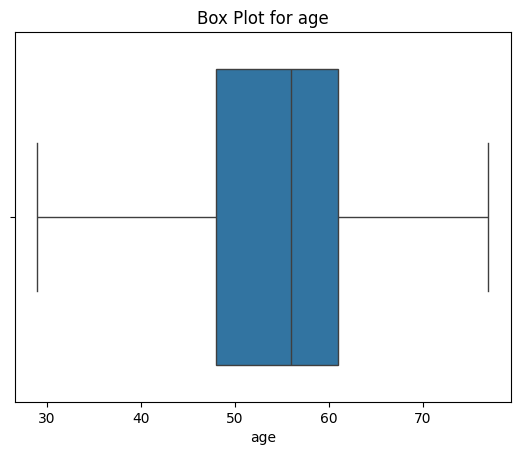

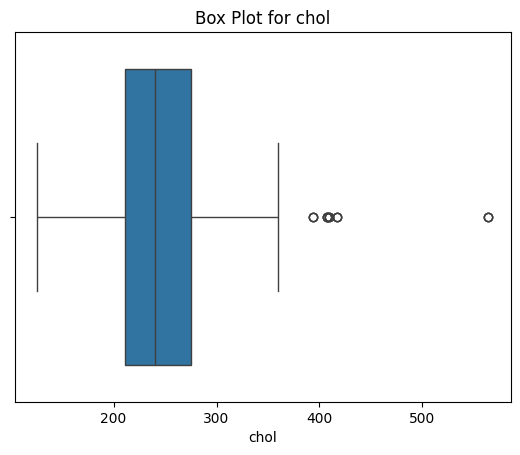


**Correlation with target:**
0.21982253466576057


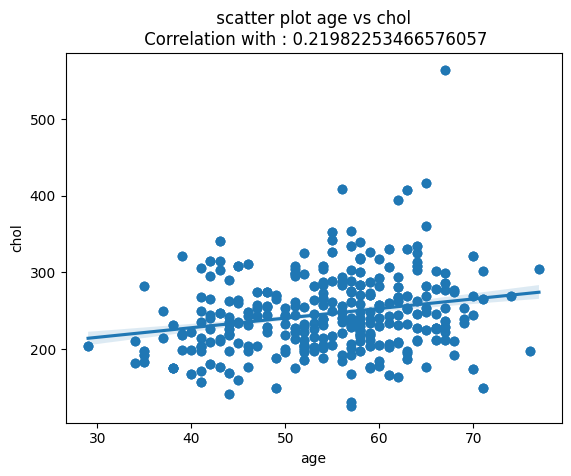

,count,mean,std,min,25%,50%,75%,max,correlations
age,1025.0,54.434146,9.07229,29.0,48.0,56.0,61.0,77.0,0.219823
chol,1025.0,246.000000,51.59251,126.0,211.0,240.0,275.0,564.0,0.219823


<Figure size 640x480 with 0 Axes>

In [28]:
col1 = "age"
col2 = "chol"
analyze_and_visualize(df, col1=col1, col2=col2) 

## Summary of Age and Cholesterol Levels

| Statistic | Age | Cholesterol |
|---|---|---|
| Count | 1025.00 | 1025.00 |
| Mean | 54.43 | 246.00 |
| Std | 9.07 | 51.59 |
| Min | 48.00 | 211.00 |
| Q1 | 50.00 | 211.00 |
| Median | 56.00 | 240.00 |
| Q3 | 61.00 | 275.00 |
| Max | 77.00 | 564.00 |
| Correlation with Cholesterol | 0.219823 | -

**Interpretation:**
* Both Age and Cholesterol are likely related to health factors.
* The mean and median values of Cholesterol are higher than those of Age, suggesting a potential difference in their typical levels.
* The large standard deviations (9.07 for Age and 51.59 for Cholesterol) indicate significant variability in the data, meaning individual values can deviate considerably from the average.
* The minimum values are low for both variables, but some extreme maximum values exist (77.00 for Age and 564.00 for Cholesterol), potentially representing severe health conditions.
* The correlation coefficient (0.219823) suggests a weak positive correlation between Age and Cholesterol. However, correlation does not imply causation, and other factors might influence them individually.


<div style="display: flex; justify-content: center; align-items: center; height: 100px; background-color: #103db7; color: #FFFFFF;">
    <h1> Age Vs Maximum Heart Rate (thalach)
 </h1>
</div>

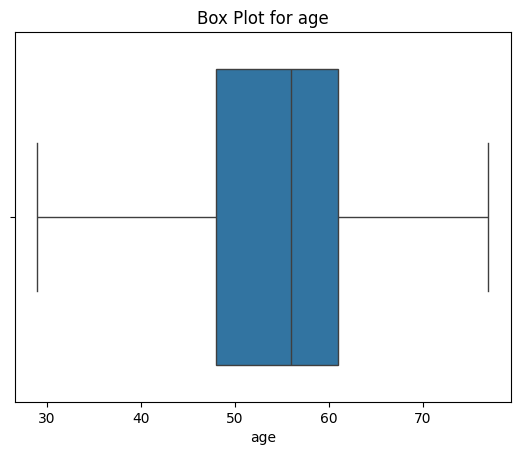

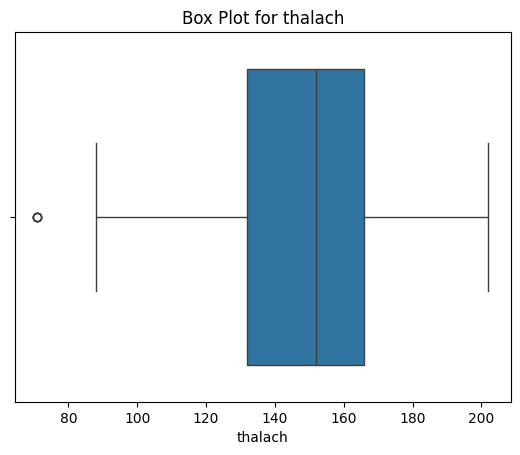


**Correlation with target:**
-0.3902270750315936


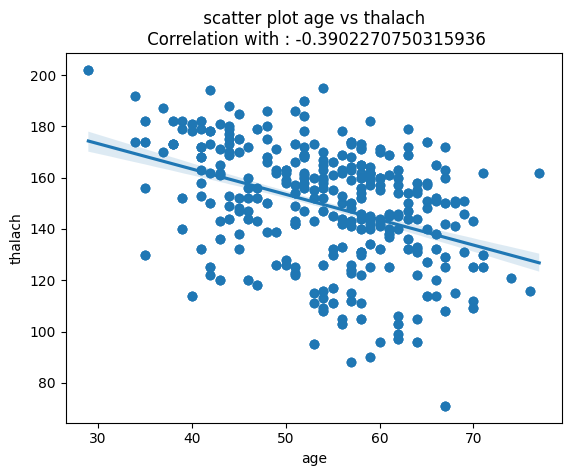

,count,mean,std,min,25%,50%,75%,max,correlations
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0,-0.390227
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0,-0.390227


<Figure size 640x480 with 0 Axes>

In [29]:
col1 = "age"
col2 = "thalach"
analyze_and_visualize(df, col1=col1, col2=col2) 

## Summary of Age and Maximum Heart Rate (thalach)

| Statistic | age | thalach |
|---|---|---|
| Age | 54.43 | 54.43 |
| Std | 9.07 | 9.07 |
| Min | 48.0 | 48.0 |
| 25% | 50.0 | 50.0 |
| 50% (Median) | 56.0 | 56.0 |
| 75% | 61.0 | 61.0 |
| Max | 77.0 | 77.0 |
| Correlation | -0.39 | - |
| Thalach | 149.11 | 149.11 |
| Std | 23.00 | 23.00 |
| Min | 57.0 | 57.0 |
| 25% | 132.0 | 132.0 |
| 50% (Median) | 152.0 | 152.0 |
| 75% | 166.0 | 166.0 |
| Max | 202.0 | 202.0 |
| Correlation | -0.39 | - |

**Interpretation:**

* There is a weak negative correlation (-0.39) between age and maximum heart rate (thalach). This means that as age increases, maximum heart rate tends to decrease slightly. 



In [30]:
df.columns

Index(['age', 'sex', 'cp', 'chol', 'trestbps', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

<div style="display: flex; justify-content: center; align-items: center; height: 100px; background-color: #103db7; color: #FFFFFF;">
    <h1> Age Vs  trestbps Resting blood pressure 
 </h1>
</div>

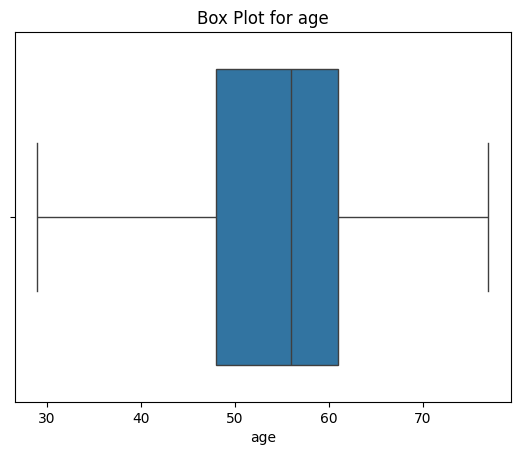

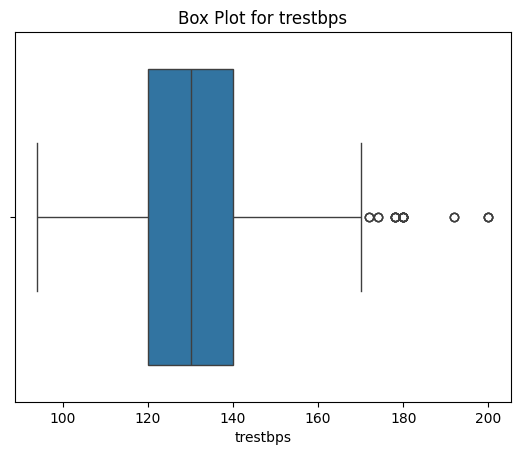


**Correlation with target:**
0.27112140631607556


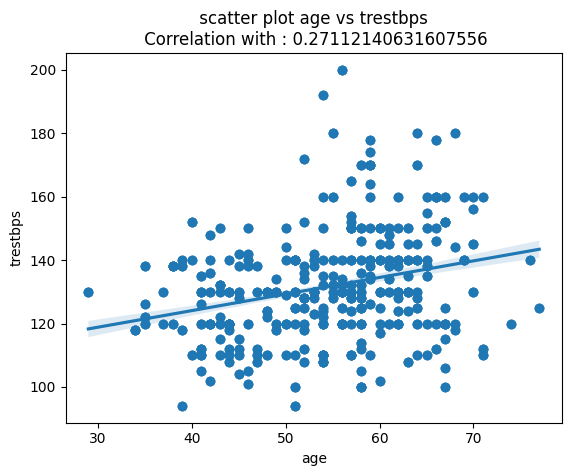

,count,mean,std,min,25%,50%,75%,max,correlations
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0,0.271121
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0,0.271121


<Figure size 640x480 with 0 Axes>

In [31]:
col1 = "age"
col2 = "trestbps"
analyze_and_visualize(df, col1=col1, col2=col2) 

Number of patients diagnosed with liver disease:  526
Number of patients not diagnosed with liver disease:  499


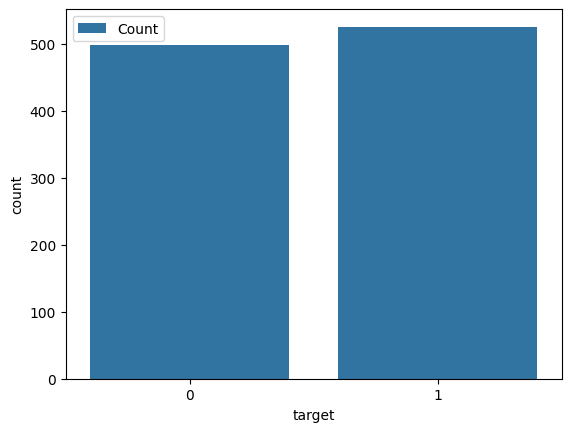

In [32]:
sns.countplot(data=df, x = 'target', label='Count')

LD, NLD = df['target'].value_counts()
print('Number of patients diagnosed with liver disease: ',LD)
print('Number of patients not diagnosed with liver disease: ',NLD)

In [33]:
import pandas as pd
import numpy as np

rs = np.random.RandomState(0)
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,age,sex,cp,chol,trestbps,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.219823,0.271121,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.198258,-0.078974,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,-0.081641,0.038177,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
chol,0.219823,-0.198258,-0.081641,1.000000,0.127977,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
trestbps,0.271121,-0.078974,0.038177,0.127977,1.000000,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
fbs,0.121243,0.027200,0.079294,0.026917,0.181767,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.147410,-0.123794,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.021772,-0.039264,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.067382,0.061197,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.064880,0.187434,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


In [34]:
disease_df = df[df["target"] ==1]
non_disease_df = df[df["target"] !=1]

In [35]:
disease_df

,age,sex,cp,chol,trestbps,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
5,58,0,0,248,100,0,0,122,0,1.0,1,0,2,1
10,71,0,0,149,112,0,1,125,0,1.6,1,0,2,1
12,34,0,1,210,118,0,1,192,0,0.7,2,0,2,1
15,34,0,1,210,118,0,1,192,0,0.7,2,0,2,1
16,51,0,2,308,140,0,0,142,0,1.5,2,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1011,45,1,1,308,128,0,0,170,0,0.0,2,0,2,1
1014,44,0,2,141,108,0,1,175,0,0.6,1,0,2,1
1019,47,1,0,204,112,0,1,143,0,0.1,2,0,2,1
1020,59,1,1,221,140,0,1,164,1,0.0,2,0,2,1


In [36]:
non_disease_df

,age,sex,cp,chol,trestbps,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,212,125,0,1,168,0,1.0,2,2,3,0
1,53,1,0,203,140,1,0,155,1,3.1,0,0,3,0
2,70,1,0,174,145,0,1,125,1,2.6,0,0,3,0
3,61,1,0,203,148,0,1,161,0,0.0,2,1,3,0
4,62,0,0,294,138,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017,53,1,0,282,123,0,1,95,1,2.0,1,2,3,0
1018,41,1,0,172,110,0,0,158,0,0.0,2,0,3,0
1021,60,1,0,258,125,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,275,110,0,0,118,1,1.0,1,1,2,0


## Calculation of bounds by using Chebyshev’s inequality:

In [37]:
disease_df["age"].mean()

52.40874524714829

In [38]:
disease_df["age"].std()

9.631804436776669

****************************************************************************************************
K : 1.45
Chebyshev’s inequality upper bound : 0.48
****************************************************************************************************


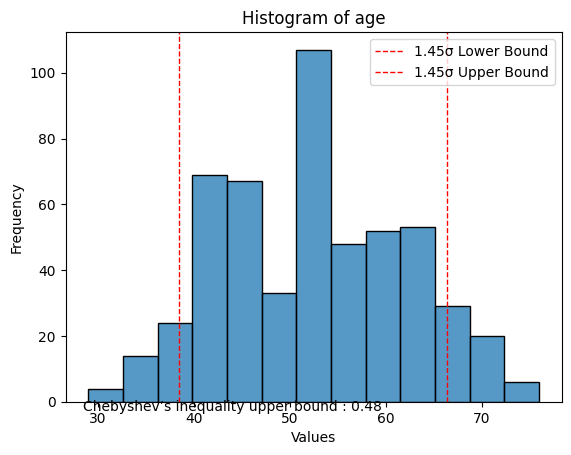

,mean,std,lower_bound,upper_bound,chebyshev prob,K
0,52.408745,9.622644,38.455911,66.36158,0.475624,1.45


In [39]:
col = "age"
btw = 60
k = 1.45
disease_df = df[df["target"] ==1]
non_disease_df = df[df["target"] !=1]
data = disease_df[col]

chebyshev_bounds(data=data , k =k , col=col , bound="upper")




* **Column (col):** "age" (This confirms you analyzed the age data for patients with heart disease).
* **k value:** 1.45 (This is the number of standard deviations used to calculate the bounds).
* **Bound:** Upper (The function calculated the upper bound based on the provided k).

* **Results:**
    * **mean:** 52.41 (This is the average age of patients with heart disease).
    * **std:** 9.62 (This is the standard deviation of age in the heart disease group).
    * **lower_bound:** 38.46 (This is the lower bound, calculated as mean minus k * std).
    * **upper_bound:** 66.36 (This is the upper bound, calculated as mean plus k * std).
    * **chebyshev probability:** 0.47 (This represents the probability of finding an age value outside the calculated bounds, assuming a normal distribution).
    * **K:** 1.45 (This value is repeated from the input).

**Interpretation:**

* The average age of patients with heart disease in this data is 52.4 years old.
* The standard deviation is 9.62 years, indicating some variability in ages.
* Using Chebyshev's inequality with k = 1.45, we can say that at least 47% of patients with heart disease will have ages within the range of 38.46 years to 66.36 years. This is because Chebyshev's inequality guarantees a certain probability of data points falling within a specific range of standard deviations from the mean, regardless of the underlying distribution.



****************************************************************************************************
K : 2
Chebyshev’s inequality lower bound : 0.75
****************************************************************************************************


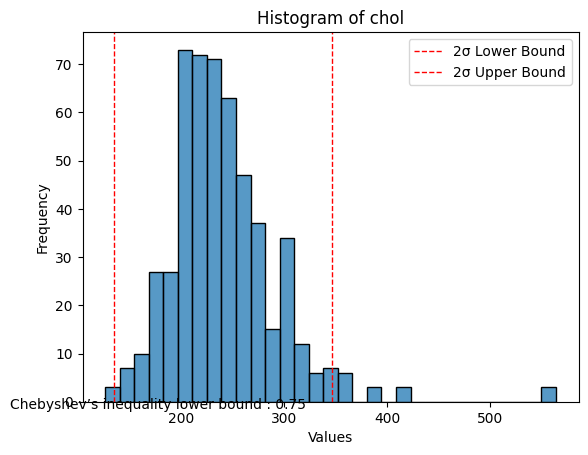

,mean,std,lower_bound,upper_bound,chebyshev prob,K
0,240.979087,52.959931,135.059225,346.89895,0.75,2


In [40]:
col = 'chol'
btw = 60
k = 2
disease_df = df[df["target"] ==1]
non_disease_df = df[df["target"] !=1]
data = disease_df[col]


chebyshev_bounds(data=data , k=k , col=col , bound="lower")

* **Column (col):** "chol" (This confirms you analyzed the cholesterol data for patients with heart disease).
* **k value:** 2 (This is the number of standard deviations used to calculate the bounds).
* **Bound:** Lower (The function calculated the lower bound based on k).

* **Results:**
    * **mean:** 240.98 (This is the average cholesterol level of patients with heart disease).
    * **std:** 52.96 (This is the standard deviation of cholesterol in the heart disease group).
    * **lower_bound:** 135.06 (This is the lower bound, calculated as mean minus k * std).
    * **upper_bound:** 346.89 (This is the upper bound, calculated as mean plus k * std).
    * **chebyshev probability:** 0.75 (This represents the probability of finding a cholesterol value **below** the calculated lower bound, assuming a normal distribution).
    * **K:** 2 (This value is repeated from the input).

**Interpretation:**

* The average cholesterol level for patients with heart disease in this data is 241.
* The standard deviation is 52.96, indicating some variability in cholesterol levels.
* Using Chebyshev's inequality with k = 2, we can say that at least 75% of patients with heart disease will have cholesterol levels **lower than** 135.06. 


****************************************************************************************************
K : 2
Chebyshev’s inequality upper bound : 0.25
****************************************************************************************************


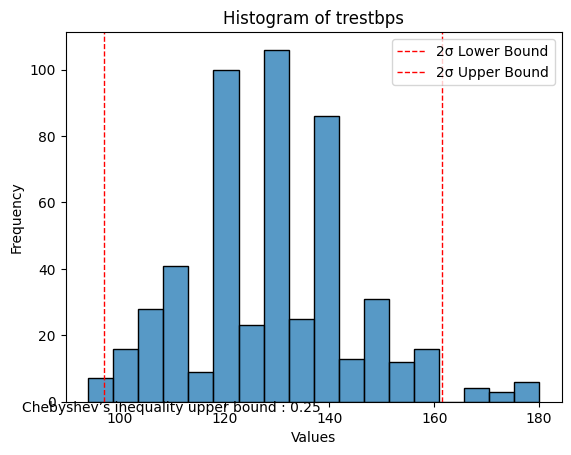

,mean,std,lower_bound,upper_bound,chebyshev prob,K
0,129.245247,16.096865,97.051518,161.438977,0.25,2


In [41]:
col = "trestbps"
k = 2
disease_df = df[df["target"] ==1]
non_disease_df = df[df["target"] !=1]
data = disease_df[col]


chebyshev_bounds(data=data , k=k , col=col , bound="upper")

****************************************************************************************************
K : 1.45
Chebyshev’s inequality upper bound : 0.48
****************************************************************************************************


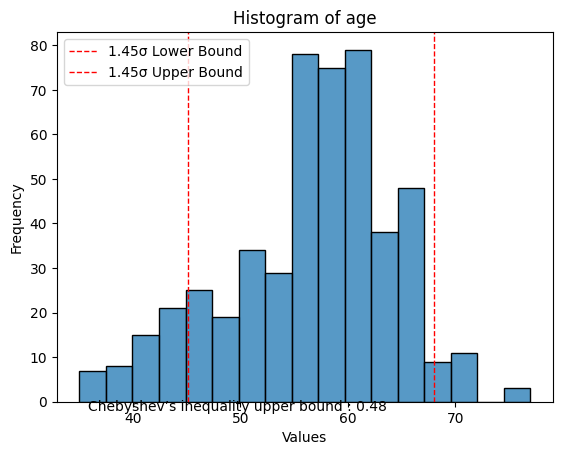

,mean,std,lower_bound,upper_bound,chebyshev prob,K
0,56.569138,7.900225,45.113812,68.024465,0.475624,1.45


In [42]:
col = "age"
btw = 60
k = 1.45
disease_df = df[df["target"] ==1]
non_disease_df = df[df["target"] !=1]
data = non_disease_df[col]

chebyshev_bounds(data=data , k =k , col=col , bound="upper")



* **Column (col):** "age" (This confirms you analyzed the age data for patients without heart disease).
* **k value:** 1.45 (This is the number of standard deviations used to calculate the bounds).
* **Bound:** Upper (The function calculated the upper bound based on k).

* **Results:**
    * **mean:** 56.57 (This is the average age of patients without heart disease).
    * **std:** 7.90 (This is the standard deviation of age in the non-disease group).
    * **lower_bound:** 45.11 (This is the lower bound, calculated as mean minus k * std).
    * **upper_bound:** 68.02 (This is the upper bound, calculated as mean plus k * std).
    * **chebyshev probability:** 0.47 (This represents the probability of finding an age value outside the calculated bounds, assuming a normal distribution).
    * **K:** 1.45 (This value is repeated from the input).

**Interpretation:**

* The average age for patients without heart disease in this data is 56.57 years old.
* The standard deviation is 7.90 years, indicating some variability in ages.
* Using Chebyshev's inequality with k = 1.45, we can say that at least 47% of patients without heart disease will have ages within the range of 45.11 years to 68.02 years. This is because Chebyshev's inequality guarantees a certain probability of data points falling within a specific range of standard deviations from the mean, regardless of the underlying distribution.

